In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [3]:
airbnb = pd.read_csv('/Users/fernieqin/Desktop/DSC106/project/data/listings.csv')

In [4]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.75399,-117.12971,Entire home/apt,295,1,152,2019-02-11,1.11,1,6
1,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,NaN,2,202
2,38245,Point Loma/Liberty Station-NTC,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,75,1,142,2019-09-02,1.29,3,347
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.73188,-117.11918,Entire home/apt,74,3,381,2019-09-10,3.41,1,296
4,52286,Surf Rider Ocean Front Condo in Mission Beach,215810,Heather,NaN,Mission Bay,32.77784,-117.25355,Entire home/apt,550,7,0,NaN,NaN,1,89


In [5]:
#inspect different room types
airbnb.groupby('room_type')['id'].count()

room_type
Entire home/apt    9615
Hotel room           32
Private room       3421
Shared room         168
Name: id, dtype: int64

In [6]:
#one hot encode the room type
airbnb['room_type_numeric'] = np.where(airbnb['room_type'] == 'Entire home/apt', 1, 0)
airbnb.loc[airbnb['room_type_numeric'] == 0, 'room_type_numeric'] = 'room'
airbnb.loc[airbnb['room_type_numeric'] == 1, 'room_type_numeric'] = 'apartment'
airbnb.groupby('room_type_numeric')['id'].count()

room_type_numeric
apartment    9615
room         3621
Name: id, dtype: int64

In [7]:
data = {'price_per_night':airbnb['price'], 'room_type':airbnb['room_type_numeric']}
# Creates pandas DataFrame. 
df = pd.DataFrame(data)
df.head()

,price_per_night,room_type
0,295,apartment
1,2050,apartment
2,75,room
3,74,apartment
4,550,apartment


In [8]:
#normalize the price column
normalized_price = df.groupby(['room_type'])['price_per_night'].apply(lambda x: (x - np.mean(x)) / np.std(x))
df['normalized_price'] = normalized_price
df.head()

,price_per_night,room_type,normalized_price
0,295,apartment,0.056267
1,2050,apartment,4.602278
2,75,room,-0.073027
3,74,apartment,-0.516193
4,550,apartment,0.716799


In [9]:
room_types = ['apartment', 'room']

Text(0.5, 1.0, 'Price Per Night by Room Type')

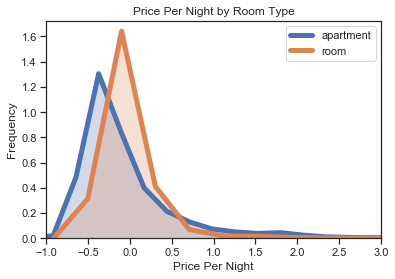

In [10]:
for room_type in room_types:
    # Subset to the airline
    subset = df[df['room_type'] == room_type]
    
    # Draw the density plot
    sns.distplot(subset['normalized_price'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 5}, 
                      label = room_type)
plt.xlim(-1,3)
plt.xlabel('Price Per Night')
plt.ylabel('Frequency')
plt.title('Price Per Night by Room Type')

In [11]:
#categorize price
for i in np.arange(0, 1000, 50):
    df.loc[(df['price_per_night'] <= i) & (df['price_per_night'] > i-50), 'catergorized_price_sec'] = i

In [12]:
df.head()

,price_per_night,room_type,normalized_price,catergorized_price_sec
0,295,apartment,0.056267,300.0
1,2050,apartment,4.602278,NaN
2,75,room,-0.073027,100.0
3,74,apartment,-0.516193,100.0
4,550,apartment,0.716799,550.0


In [13]:
df.groupby(['room_type', 'catergorized_price_sec'])['price_per_night'].count()

room_type  catergorized_price_sec
apartment  0.0                          2
           50.0                        79
           100.0                     1895
           150.0                     2243
           200.0                     1601
           250.0                      838
           300.0                      721
           350.0                      411
           400.0                      359
           450.0                      221
           500.0                      268
           550.0                      122
           600.0                      149
           650.0                       53
           700.0                      101
           750.0                       54
           800.0                       68
           850.0                       32
           900.0                       58
           950.0                       30
room       50.0                      1160
           100.0                     1792
           150.0                      351


Text(0.5, 1.0, 'Nomalized Price Per Night by Room Type')

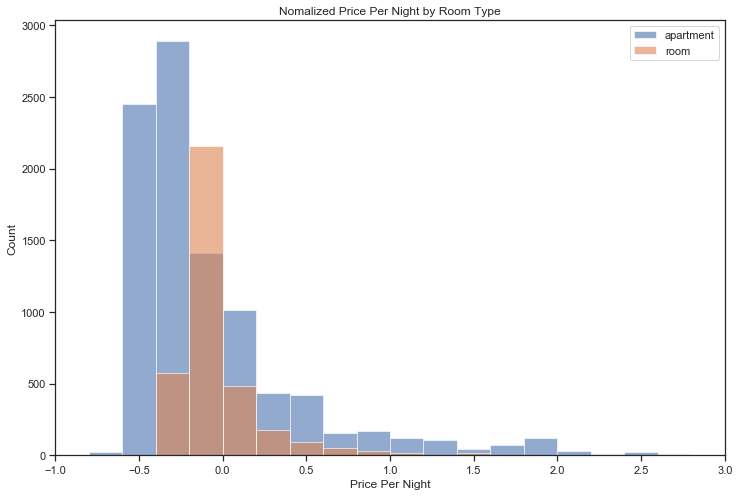

In [14]:
bin_values = np.arange(start=-1, stop=3, step=0.2)
viz = df.groupby('room_type')['normalized_price'] # group values by carrier, select minutes delayed
viz.plot(kind='hist', bins=bin_values, figsize=[12,8], alpha=.6, legend=True) # alpha for transparency
plt.xlim(-1, 3)
plt.xlabel('Price Per Night')
plt.ylabel('Count')
plt.title('Nomalized Price Per Night by Room Type')

In [15]:
#categorize price
for i in np.arange(-1, 3, 0.2):
    df.loc[(df['normalized_price'] <= i) & (df['normalized_price'] > i - 0.2), 'catergorized_normalized_price_sec'] = i

In [16]:
df.groupby(['catergorized_normalized_price_sec','room_type']).count()

price_per_night  \
catergorized_normalized_price_sec room_type                    
-6.000000e-01                     apartment               25   
-4.000000e-01                     apartment             2452   
-2.000000e-01                     apartment             2889   
                                  room                   571   
-2.220446e-16                     apartment             1410   
                                  room                  2154   
 2.000000e-01                     apartment             1014   
                                  room                   486   
 4.000000e-01                     apartment              433   
                                  room                   177   
 6.000000e-01                     apartment              420   
                                  room                    95   
 8.000000e-01                     apartment              158   
                                  room                    49   
 1.000000e+00                     apartment              166   
                                  room                    27   
 1.200000e+00                     apartment              118   
                                  room                    13   
 1.400000e+00                     apartment              104   
                                  room                     4   
 1.600000e+00                     apartment               46   
                                  room                    19   
 1.800000e+00                     apartment               75   
                                  room                     5   
 2.000000e+00                     apartment              117   
                                  room                     4   
 2.200000e+00                     apartment               28   
                                  room                     2   
 2.400000e+00                     apartment               12   
                                  room                     1   
 2.600000e+00                     apartment               25   
                                  room                     2   
 2.800000e+00                     apartment                9   
                                  room                     1   

                                             normalized_price  \
catergorized_normalized_price_sec room_type                     
-6.000000e-01                     apartment                25   
-4.000000e-01                     apartment              2452   
-2.000000e-01                     apartment              2889   
                                  room                    571   
-2.220446e-16                     apartment              1410   
                                  room                   2154   
 2.000000e-01                     apartment              1014   
                                  room                    486   
 4.000000e-01                     apartment               433   
                                  room                    177   
 6.000000e-01                     apartment               420   
                                  room                     95   
 8.000000e-01                     apartment               158   
                                  room                     49   
 1.000000e+00                     apartment               166   
                                  room                     27   
 1.200000e+00                     apartment               118   
                                  room                     13   
 1.400000e+00                     apartment               104   
                                  room                      4   
 1.600000e+00                     apartment                46   
                                  room                     19   
 1.800000e+00                     apartment                75   
                                  room                      5   
 2.000000e+00                     apartment       

Text(0.5, 1.0, 'Price Per Night by Room Type')

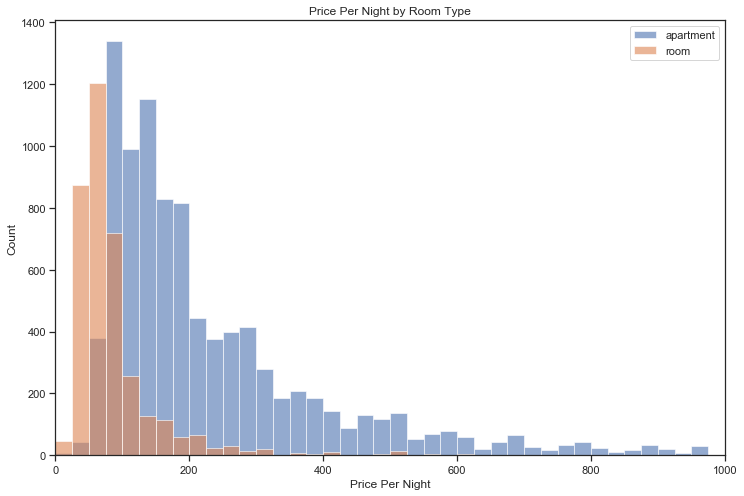

In [17]:
bin_values = np.arange(start=0, stop=1000, step=25)
viz = df.groupby('room_type')['price_per_night'] # group values by carrier, select minutes delayed
viz.plot(kind='hist', bins=bin_values, figsize=[12,8], alpha=.6, legend=True) # alpha for transparency
plt.xlim(0, 1000)
plt.xlabel('Price Per Night')
plt.ylabel('Count')
plt.title('Price Per Night by Room Type')

Text(0.5, 1.0, 'Price Per Night by Room Type')

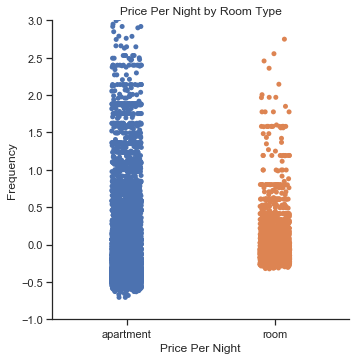

In [18]:
#sns.catplot(x="Price Per Night", y="Distribution", hue="sex", kind="swarm", data=tips);
sns.catplot(x="room_type", y="normalized_price", data = df)
plt.ylim(-1, 3)
plt.xlabel('Price Per Night')
plt.ylabel('Frequency')
plt.title('Price Per Night by Room Type')

In [19]:
df.to_csv('/Users/fernieqin/Desktop/demo/data/room_type_price.csv', index = False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fernieqin/Desktop/demo/data/room_type_price.csv'

# pie chart

In [ ]:
#make a pie out of host_listings
#airbnb.groupby('calculated_host_listings_count')['id'].count()

In [20]:
airbnb.loc[airbnb['calculated_host_listings_count'] == 1, 'host_listing_count'] = 'only_one'
airbnb.loc[(airbnb['calculated_host_listings_count'] <=5) & (airbnb['calculated_host_listings_count'] > 1), 'host_listing_count'] = 'less_five'
airbnb.loc[(airbnb['calculated_host_listings_count'] <=10) & (airbnb['calculated_host_listings_count'] > 6), 'host_listing_count'] = 'less_ten'
airbnb.loc[(airbnb['calculated_host_listings_count'] > 10) & (airbnb['calculated_host_listings_count'] <= 50), 'host_listing_count'] = 'less_50'
airbnb.loc[(airbnb['calculated_host_listings_count'] > 50), 'host_listing_count'] = 'too_many'

In [21]:
#need for pie chart
airbnb.groupby('host_listing_count')['id'].count()

host_listing_count
less_50      1844
less_five    3973
less_ten      656
only_one     5588
too_many      899
Name: id, dtype: int64

# scatter plot

In [22]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_numeric,host_listing_count
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.75399,-117.12971,Entire home/apt,295,1,152,2019-02-11,1.11,1,6,apartment,only_one
1,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,NaN,2,202,apartment,less_five
2,38245,Point Loma/Liberty Station-NTC,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,75,1,142,2019-09-02,1.29,3,347,room,less_five
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.73188,-117.11918,Entire home/apt,74,3,381,2019-09-10,3.41,1,296,apartment,only_one
4,52286,Surf Rider Ocean Front Condo in Mission Beach,215810,Heather,NaN,Mission Bay,32.77784,-117.25355,Entire home/apt,550,7,0,NaN,NaN,1,89,apartment,only_one


In [23]:
availability = airbnb['availability_365']
price_per_night = airbnb['price']
room_types_numeric = airbnb['room_type_numeric']
airbnb['projected_monthly_income'] = airbnb['price'].apply(lambda x : x*30)
airbnb['monthly_availability'] = airbnb['availability_365'].apply(lambda x : x//12)

In [24]:
scatter_data = {'monthly_availability' : airbnb['monthly_availability'], 'projected_monthly_income' : airbnb['projected_monthly_income'], 'room_types': room_types_numeric}
scatter_df = pd.DataFrame(scatter_data)

In [25]:
scatter_df.to_csv('/Users/fernieqin/Desktop/DSC106/Project/data/scatter_data.csv', index = False)

In [26]:
scatter_df.head()

,monthly_availability,projected_monthly_income,room_types
0,0,8850,apartment
1,16,61500,apartment
2,28,2250,room
3,24,2220,apartment
4,7,16500,apartment


## bar chart by neighborhood

In [27]:
neighborhood_groups = airbnb['neighbourhood']
price_per_night = airbnb['price']
room_types_numeric = airbnb['room_type_numeric']
airbnb['projected_monthly_income'] = airbnb['price'].apply(lambda x : x*30)
listing_num = airbnb.host_listing_count

In [28]:
bar_data = {'neighborhood' : neighborhood_groups, 'price_per_night' : price_per_night, 
            'projected_monthly_income' : airbnb['projected_monthly_income'], 
            'room_types': room_types_numeric, 'host_listing_count' : listing_num}
bar_df = pd.DataFrame(bar_data)

In [29]:
bar_df.head()

,neighborhood,price_per_night,projected_monthly_income,room_types,host_listing_count
0,North Hills,295,8850,apartment,only_one
1,Mission Bay,2050,61500,apartment,less_five
2,Roseville,75,2250,room,less_five
3,North Hills,74,2220,apartment,only_one
4,Mission Bay,550,16500,apartment,only_one


In [30]:
bar_df.groupby('host_listing_count')['price_per_night'].mean()#.values

host_listing_count
less_50      298.260846
less_five    179.966524
less_ten     226.012195
only_one     195.286865
too_many     429.709677
Name: price_per_night, dtype: float64

In [38]:
quarter_point = bar_df.shape[0]//4

In [39]:
top_quarter_indexes = pd.Series(bar_df.price_per_night).sort_values(ascending = False).index[:quarter_point]
sec_quarter_indexes = pd.Series(bar_df.price_per_night).sort_values(ascending = False).index[quarter_point:quarter_point*2]
trd_quarter_indexes = pd.Series(bar_df.price_per_night).sort_values(ascending = False).index[quarter_point*2:quarter_point*3]
for_quarter_indexes = pd.Series(bar_df.price_per_night).sort_values(ascending = False).index[quarter_point*3:]

In [40]:
top_q_most_projected_income = bar_df.iloc[top_quarter_indexes]
top_q_most_projected_income.head()

,neighborhood,price_per_night,projected_monthly_income,room_types,host_listing_count
12810,Mission Bay,10000,300000,apartment,less_five
12735,Loma Portal,10000,300000,apartment,less_five
11538,Old Town,10000,300000,apartment,less_50
3514,Marina,10000,300000,room,only_one
13226,Little Italy,10000,300000,apartment,less_five


In [36]:
#investigate most popular neighborhoods
#top_200_most_projected_income.groupby('neighborhood')['price_per_night'].count()

In [44]:
bar_df.iloc[for_quarter_indexes].groupby('room_types')['price_per_night'].count()

room_types
apartment     813
room         2496
Name: price_per_night, dtype: int64